<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Metropolis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMO METROPOLIS - HASTINGS

Vamos a progranar el algoritmo de metropolis

## TEOREMA DE LÍMITE CENTRAL

Si $X_1,X_2,...,X_n$ son son muestras aleatorias extraídas de una población con media global $\mu$ y varianza finita $\sigma^2$, y si $\bar{X}_n$ es la media muestral de las primeras $n$ muestras, entonces la forma límite de la distribución

$$Z=lim_{n \rightarrow ∞} \left(\frac{\bar{X}_n-μ}{\sigma_{\bar{X}}}\right) $$

con  $\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}$ es una distribución normal estandar.

## DISTRIBUCIÓN NORMAL
La distribución normal es una de las distribuciones de probabilidad de variable continua que se usa y aparece con más frecuencia en la estadística y teoriía de probabilidades.

Dicha distribución se define de la siguiente forma:

$$ \frac{1}{\sigma\sqrt{2\pi}} \; exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

## CÓDIGO

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

In [5]:
def f(x,mu,std):
  return (1/np.sqrt(2*np.pi*std**2))*np.exp(-(x-mu)**2/(2*std**2))

La aceptación fue del  31.646 %


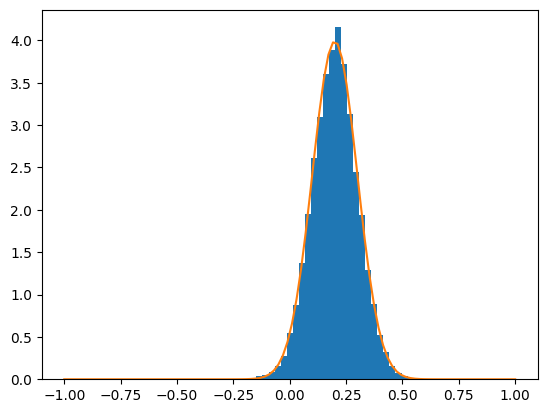

In [6]:
%matplotlib inline
mu=0.2
sigma=0.1
delta=0.5

n=50000
x=np.zeros(n)
x[0]=0
accept=0

for i in range(0,n-1):
  y=x[i]+np.random.uniform(-delta,delta)
  if np.random.rand()<min(1,f(y,mu,sigma)/f(x[i],mu,sigma)):
    x[i+1]=y
    accept=accept+1
  else:
    x[i+1]=x[i]
print("La aceptación fue del ", accept/n*100,"%")
plt.hist(x,density=True, bins=30)
xs=np.linspace(-1,1,100)
plt.plot(xs,f(xs,mu,sigma))
plt.show()

In [22]:
df = pd.DataFrame({'PARAMETROS:': ['Media', 'Desviación Estándar'], 'MUESTRA': [np.mean(x), np.std(x)],'ANALÍTICA': [mu, sigma]})
print(df.to_string(index=False))

        PARAMETROS:  MUESTRA  ANALÍTICA
              Media 0.199881        0.2
Desviación Estándar 0.100649        0.1


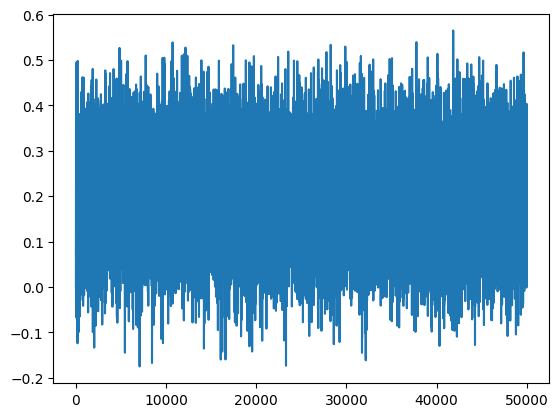

In [ ]:
plt.plot(x)
plt.show()

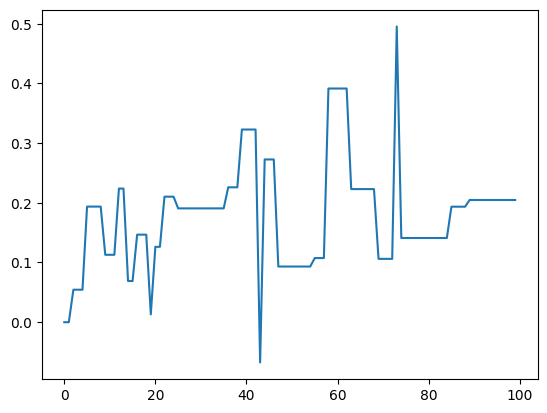

In [ ]:
plt.plot(x[:100])
plt.show()

## FUNCIÓIN DE CAUCHY

In [23]:
def cauchy(x,x0,ro):
  return (1/(np.pi*ro+(1+((x-x0)/ro)**2)))

La aceptación fue del  91.88 %


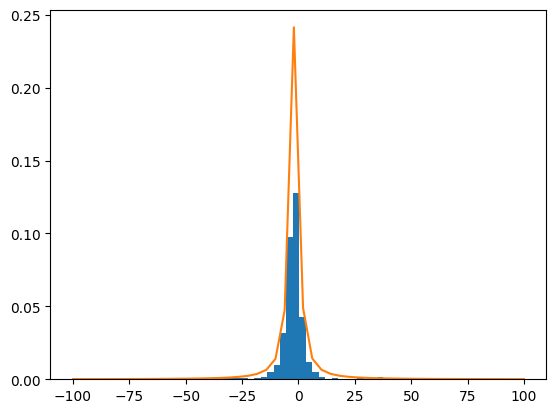

In [24]:
%matplotlib inline
x0=-2
ro=1
n=50000
x=np.zeros(n)
x[0]=0
accept=0

for i in range(0,n-1):
  y=x[i]+np.random.uniform(-ro,ro)
  if np.random.rand()<min(1,cauchy(y,x0,ro)/cauchy(x[i],x0,ro)):
    x[i+1]=y
    accept=accept+1
  else:
    x[i+1]=x[i]
print("La aceptación fue del ", accept/n*100,"%")
plt.hist(x,density=True, bins=30)
xs=np.linspace(-100,100)
plt.plot(xs,cauchy(xs,x0,ro))
plt.show()

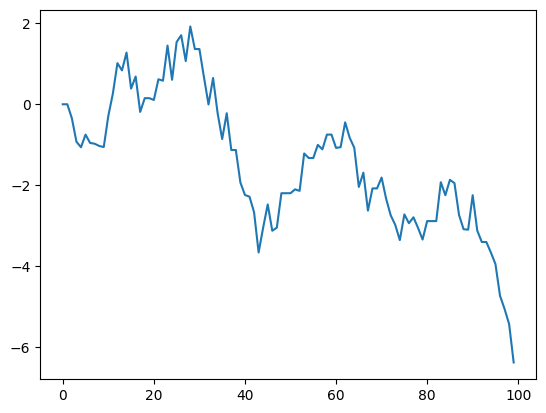

In [25]:
plt.plot(x[:100])
plt.show()

In [27]:
df = pd.DataFrame({'PARAMETROS:': ['Media', 'Desviación Estándar'], 'MUESTRA': [np.mean(x), np.std(x)],'ANALÍTICA': ["no definida", "no definida"]})
print(df.to_string(index=False))

        PARAMETROS:   MUESTRA   ANALÍTICA
              Media -2.142416 no definida
Desviación Estándar  7.215293 no definida


# FUNCIÓN GAMMA

In [36]:
from scipy.special import gamma

In [39]:
def gamma(x, k, theta):
    return (x**(k - 1) * np.exp(-x / theta)) / (theta**k * gamma(k))

In [40]:
%matplotlib inline
x0 = 2
theta = 1
n = 50000
x = np.zeros(n)
x[0] = 0
accept = 0

for i in range(0,n-1):
  y=x[i]+np.random.uniform(-1,1)
  if np.random.rand()<min(1,gamma(y, x0, theta)/gamma(x[i], x0, theta)):
    x[i+1]=y
    accept=accept+1
  else:
    x[i+1]=x[i]
print("La aceptación fue del ", accept/n*100,"%")
plt.hist(x,density=True, bins=30)
xs=np.linspace(-100,100)
plt.plot(xs,cauchy(xs,x0,ro))
plt.show()

TypeError: gamma() missing 2 required positional arguments: 'k' and 'theta'